In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [15]:
sorted_df = df.sort_values(by=["Date"],ascending=True)
sorted_df
sorted_df.to_csv("stocks_sorted.csv",index=False)

In [16]:
new_df = pd.read_csv("stocks_sorted.csv")
new_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


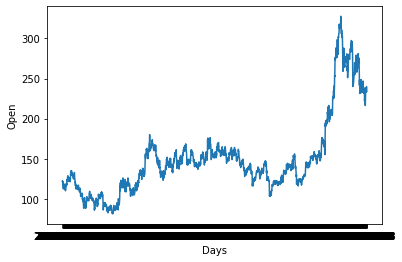

In [17]:
date = new_df.Date
opn = new_df.Open
plt.xlabel("Days")
plt.ylabel("Open")
plt.plot(date,opn)

In [19]:
closed_df = sorted_df.reset_index()["Close"]
closed_df


0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
closed_df=scaler.fit_transform(np.array(closed_df).reshape(-1,1))
closed_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [21]:
train_size=int(len(closed_df)*0.65)
test_size=len(closed_df)-train_size
train_data,test_data= closed_df[0:train_size,:],closed_df[train_size:len(closed_df),:1]

In [23]:
train_size,test_size

(1322, 713)

In [24]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19546569],
       [0.18280229],
       [0.19178922]])

In [25]:
def create_dataset(dataset, time_step=1):
	Xdata, Ydata = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		Xdata.append(a)
		Ydata.append(dataset[i + time_step, 0])
	return np.array(Xdata), np.array(Ydata)

In [26]:
step = 100 #This is to assign the duration for creating the humpy dataset from 1-100
X_train, y_train = create_dataset(train_data, step)
X_test, ytest = create_dataset(test_data, step)

In [27]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [29]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 22s 409ms/step - loss: 0.0102 - val_loss: 0.0137
Epoch 2/100
20/20 [==============================] - 7s 374ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 3/100
20/20 [==============================] - 7s 330ms/step - loss: 9.8411e-04 - val_loss: 0.0040
Epoch 4/100
20/20 [==============================] - 7s 356ms/step - loss: 9.0097e-04 - val_loss: 0.0026
Epoch 5/100
20/20 [==============================] - 10s 498ms/step - loss: 8.3852e-04 - val_loss: 0.0036
Epoch 6/100
20/20 [==============================] - 11s 535ms/step - loss: 8.0868e-04 - val_loss: 0.0027
Epoch 7/100
20/20 [==============================] - 10s 504ms/step - loss: 7.7633e-04 - val_loss: 0.0040
Epoch 8/100
20/20 [==============================] - 8s 400ms/step - loss: 8.2721e-04 - val_loss: 0.0028
Epoch 9/100
20/20 [==============================] - 8s 427ms/step - loss: 7.1795e-04 - val_loss: 0.0029
Epoch 10/100
20/20 [==============================] - 7s 37

In [37]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 37ms/step


In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

135.14063009883844

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

192.68276862291884

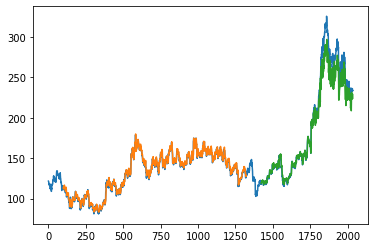

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainpredictplot = np.empty_like(closed_df)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testpredictplot = np.empty_like(closed_df)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(closed_df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(closed_df))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [43]:
len(test_data)

713

In [44]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [46]:
list_output=[]
num_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, num_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, num_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        list_output.extend(yhat.tolist())
        i=i+1
    

print(list_output)

[0.59646505]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464